# Malignant Comment Classification

### Problem Statement

The proliferation of social media enables people to express their opinions widely online. However, at the same time, this has resulted in the emergence of conflict and hate, making online environments uninviting for users. Although researchers have found that hate is a problem across multiple platforms, there is a lack of models for online hate detection. Online hate, described as abusive language, aggression, cyber bullying, hatefulness and many others has been identified as a major threat on online social media platforms. Social media platforms are the most prominent grounds for such toxic behaviour.

There has been a remarkable increase in the cases of cyber bullying and trolls on various social media platforms. Many celebrities and influences are facing backlashes from people and have to come across hateful and offensive comments. This can take a toll on anyone and affect them mentally leading to depression, mental illness, self-hatred and suicidal thoughts.

Internet comments are bastions of hatred and vitriol. While online anonymity has provided a new outlet for aggression and hate speech, machine learning can be used to fight it. The problem we sought to solve was the tagging of internet comments that are aggressive towards other users. This means that insults to third parties such as celebrities will be tagged as inoffensive, but “u are an idiot” is clearly offensive.

Our goal is to build a prototype of online hate and abuse comment classifier which can used to classify hate and offensive comments so that it can be controlled and restricted from spreading hatred and cyber bullying.

### Data Set Description

The data set contains the training set, which has approximately 1,59,000 samples and the test set which contains nearly 1,53,000samples. All the data samples contain 8 fields which includes ‘Id’, ‘Comments’, ‘Malignant’, ‘Highly malignant’, ‘Rude’, ‘Threat’, ‘Abuse’ and ‘Loathe’.

The label can be either 0 or 1, where 0denotes a NO while 1 denotes a YES. There are various comments which have multiple labels. The first attribute is a unique ID associated with each comment. The data set includes:

- Malignant: It is the Label column, which includes values 0 and 1, denoting if the comment is malignant or not.
- Highly Malignant: It denotes comments that are highly malignant and hurtful.
- Rude: It denotes comments that are very rude and offensive.
- Threat: It contains indication of the comments that are giving any threat to someone.
- Abuse: It is for comments that are abusive in nature.
- Loathe: It describes the comments which are hateful and loathing in nature.
- ID:It includes unique Ids associated with each comment text given.
- Comment text: This column contains the comments extracted from various social media platforms.

This project is more about exploration, feature engineering and classification that can be done on this data. Since the data set is huge and includes many categories of comments, we can do good amount of data exploration and derive some interesting features using the comments text column available.

We need to build a model that can differentiate between comments and its categories.

### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import nltk
from nltk import FreqDist
nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

import re
import os
import string
import joblib

import warnings as war
war.filterwarnings('ignore')

### Loading the Dataset

In [2]:
# loading the training dataset
train_df = pd.read_csv("Malignant_train_data.csv")
train_df

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [3]:
train_df.columns

Index(['id', 'comment_text', 'malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe'],
      dtype='object')

In [4]:
# loading the test dataset
test_df = pd.read_csv("Malignant_test_data.csv")
test_df

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


In [5]:
# checking the shape
print(f"The training dataset, we have {train_df.shape[0]} Rows and {train_df.shape[1]} columns present including target variable")
print(f"And also we have the test dataset, there are {test_df.shape[0]} Rows and {test_df.shape[1]} columns ")

The training dataset, we have 159571 Rows and 8 columns present including target variable
And also we have the test dataset, there are 153164 Rows and 2 columns 


## EDA

In [6]:
# checking info
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


- We have a total of 8 columns, in which 2 columns are object datatype though the remaining 6 columns are of integer datatype.
- The id column, once again, does not appear to be of any use and may be eliminated.

In [7]:
# dropping the id columns first
train_df.drop("id",axis=1,inplace=True)
test_df.drop("id",axis=1,inplace=True)

In [8]:
# description
train_df.describe()

,malignant,highly_malignant,rude,threat,abuse,loathe
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
# chekcing skewness
train_df.skew()

malignant            2.745854
highly_malignant     9.851722
rude                 3.992817
threat              18.189001
abuse                4.160540
loathe              10.515923
dtype: float64

In [10]:
# checking nulls
train_df.isna().sum()

comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

There is no missing values present in training dataset.

In [11]:
test_df.isna().sum()

comment_text    0
dtype: int64

Also in test dataset no missing values are present.

In [12]:
# Checking the label
no_harm=round(train_df.malignant.value_counts(normalize=True)[0]*100,2)
harm=round(train_df.malignant.value_counts(normalize=True)[1]*100,2)

print("There are total", harm ,"percent of malignant comments.")
print("And also there are", no_harm , "precent of normal comments.")

There are total 9.58 percent of malignant comments.
And also there are 90.42 precent of normal comments.


Thus we can say that our dataset are imbalanced dataset. So we have to treat them according to the need, before the model building.

### Let's check the first 10 comments

In [13]:
for i in range(10):
    print(train_df.comment_text[i])
    print("\n")

Explanation
Why the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27


D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)


Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.


"
More
I can't make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of ""types of accidents""  -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or

In [14]:
# creating a new column for counting the characters present  in the comments
train_df['char_count'] = train_df['comment_text'].apply(len)
train_df.head()

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,char_count
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,233
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,622
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,67


## Visualization

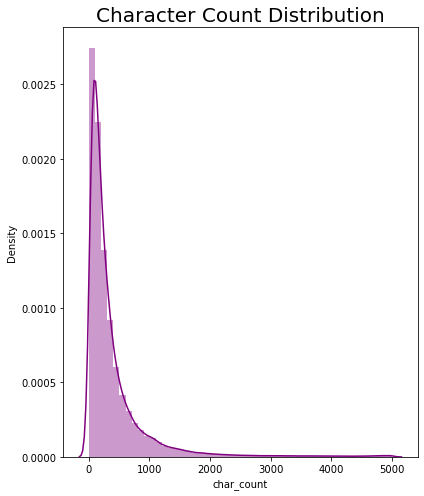

In [15]:
# Let's visulaize our character count first
plt.figure(figsize=(6,7))
sns.distplot(train_df['char_count'], kde=True,color='purple')
plt.title('Character Count Distribution',fontsize=20)
plt.tight_layout()

- Maximum comments are in the range of 500 characters.
- Some comments are too long, there are upto 5000 alphabets present.

<AxesSubplot:xlabel='malignant', ylabel='count'>

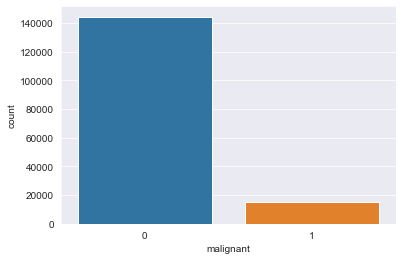

In [16]:
# visualize the label
sns.set_style("darkgrid")
sns.countplot(train_df['malignant'])

As we clearly see that our target variable is highly imbalanced.

<AxesSubplot:xlabel='highly_malignant', ylabel='count'>

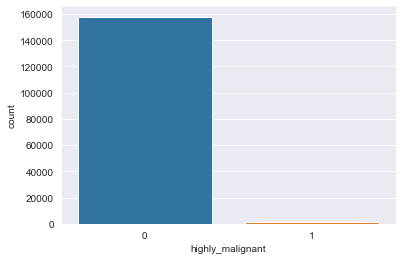

In [17]:
# highly malignant
sns.set_style("darkgrid")
sns.countplot(train_df['highly_malignant'])

There are very less number of comments are highly malignant.

<AxesSubplot:xlabel='rude', ylabel='count'>

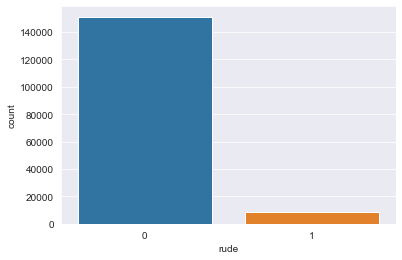

In [18]:
# Rude comments
sns.set_style("darkgrid")
sns.countplot(train_df['rude'])

- There are Very less number of rude comments present.
- But the number of rude comments in the dataset is little bit higher then highly malignant comments.

<AxesSubplot:xlabel='threat', ylabel='count'>

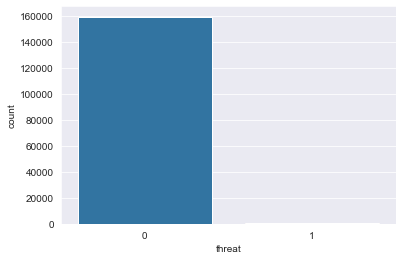

In [19]:
# Threat Comments
sns.set_style("darkgrid")
sns.countplot(train_df['threat'])

- We can clearily see that the number of threat comments are negligible.

<AxesSubplot:xlabel='abuse', ylabel='count'>

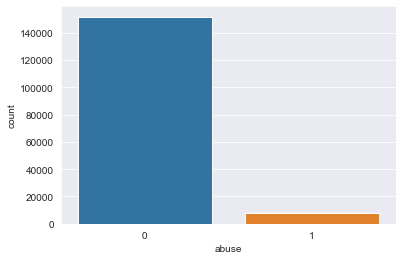

In [20]:
# Abuse comments
sns.set_style("darkgrid")
sns.countplot(train_df['abuse'])

- There are little bit abusive comments But overall we can say that most of the comments are not abusive.

### Correlation

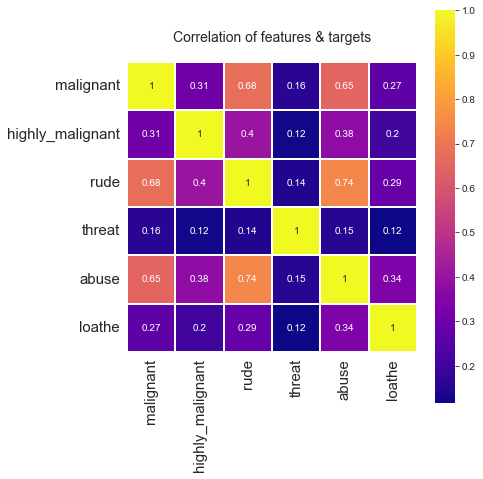

In [21]:
df=train_df[['malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe']]

colormap = plt.cm.plasma
plt.figure(figsize=(7,7))
plt.title('Correlation of features & targets',y=1.05,size=14)
sns.heatmap(df.astype(float).corr(),linewidths=0.1,vmax=1.0,square=True,cmap=colormap,
           linecolor='white',annot=True)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()

- Rude & Abuse Feature are respectevely 68% and 65% able to tell us about the target variable.
- Loathe feature are very less correlated with our Target varibale.
- All features are positively correlated with target.
- Rude & Abuse Feature are also correlated with each other with 74% correlation, which is showing multi-collinearity problem here.

### Cleaning the Comments

In [22]:
# Convert all the comments into lower case
train_df['comment_text'] = train_df['comment_text'].str.lower()
test_df['comment_text'] = test_df['comment_text'].str.lower()

In [23]:
# Removing Special charactors
charactors=['.',':',';','(',')','!','@','$','^','[^\w\s]','/','?','<','>']
for i in charactors:
    train_df['comment_text'] = train_df['comment_text'].str.replace(i,'')

In [24]:
# for test dataset
for i in charactors:
    test_df['comment_text'] = test_df['comment_text'].str.replace(i,'')

In [25]:
# Replace email addresses with 'email'
train_df['comment_text'] = train_df['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')
test_df['comment_text'] = test_df['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

# Replace URLs with 'webaddress'
train_df['comment_text'] = train_df['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')
test_df['comment_text'] = test_df['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

In [26]:
# Replacing '\n' with ' '
train_df.comment_text = train_df.comment_text.str.replace('\n',' ')

In [27]:
# cleaning the unwanted text

def unwanted_text(string):
    string = re.sub(r"won't", "will not",string)
    string = re.sub(r"don’t", "do not",string)
    string = re.sub(r"doesn’t", "does not",string)
    string= re.sub(r"haven’t", "have not", string)
    string = re.sub(r"can't", "can not", string)
    string = re.sub(r"im ", "i am", string)
    string = re.sub(r"yo ", "you ",string)
    string = re.sub(r"n\'t", " not", string)
    string = re.sub(r"\'re", " are", string)
    string = re.sub(r"\'s", " is", string)
    string = re.sub(r"\'d", " would", string)
    string = re.sub(r"\'ll", " will", string)
    string = re.sub(r"\'t", " not", string)
    string = re.sub(r"\'ve", " have", string)
    string = re.sub(r"\'m", " am", string)
    string = re.sub(r"<br>", " ", string)
    string = re.sub(r"what's", "what is ", string)
    string = re.sub(r"\'s", " ", string)
    string = re.sub(r"\'ve", " have ", string)
    string = re.sub(r"can't", "cannot ", string)
    string= re.sub(r"n't", " not ", string)
    string= re.sub(r"i'm", "i am ", string)
    string= re.sub(r"\'re", " are ", string)
    string= re.sub(r"\'d", " would ", string)
    string= re.sub(r"\'ll", " will ", string)
    string= re.sub(r"\'scuse", " excuse ",string)
    string= re.sub('\W', ' ', string)
    string= re.sub('\s+', ' ', string)
    string= string.strip(' ')
    # removing all the urls
    string = re.sub(r'http\S+', '', string) 
    return string

In [28]:
# cleaning the comments
pd.set_option('display.max_colwidth', -1)
train_df['comment_text'] = train_df['comment_text'].map(lambda comment : unwanted_text(comment))
train_df.head()

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,char_count
0,explanation why the edits made under my username hardcore metallica fan were reverted they werent vandalisms just closure on some gas after i voted at new york dolls fac and please dont remove the template from the talk page since i amretired now892053827,0,0,0,0,0,0,264
1,daww he matches this background colour i amseemingly stuck with thanks talk 2151 january 11 2016 utc,0,0,0,0,0,0,112
2,hey man i amreally not trying to edit war its just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page he seems to care more about the formatting than the actual info,0,0,0,0,0,0,233
3,more i cant make any real suggestions on improvement i wondered if the section statistics should be later on or a subsection of types of accidents i think the references may need tidying so that they are all in the exact same format ie date format etc i can do that later on if noone else does first if you have any preferences for formatting style on references or want to do it yourself please let me know there appears to be a backlog on articles for review so i guess there may be a delay until a reviewer turns up its listed in the relevant form eg wikipediagood_article_nominationstransport,0,0,0,0,0,0,622
4,you sir are my hero any chance you remember what page thats on,0,0,0,0,0,0,67


- Now our dataset seems quite fine now.
- But it needs to be some more clean like we see that their are '-' character,numbers etc are present. we will either replace them or delete them.

In [29]:
# cleaning the text data also
pd.set_option('display.max_colwidth', -1)
test_df['comment_text'] = test_df['comment_text'].map(lambda comment : unwanted_text(comment))
test_df.head()

,comment_text
0,you bitch ja rule is more succesful then youll ever be whats up with you and hating you sad mofuckasi should bitch slap ur pethedic white faces and get you to kiss my ass you guys sicken me ja rule is about pride in da music man dont diss that shit on hi amand nothin is wrong bein like tupac he was a brother toofuckin white boys get things right next time
1,from rfc the title is fine as it is imo
2,sources zawe ashton on lapland
3,if you have a look back at the source the information i updated was the correct form i can only guess the source hadnt updated i shall update the information once again but thank you for your message
4,i dont anonymously edit articles at all


In [30]:
# checking the unique values
train_df.apply(lambda x: len(x.unique()))

comment_text        158759
malignant           2     
highly_malignant    2     
rude                2     
threat              2     
abuse               2     
loathe              2     
char_count          4048  
dtype: int64

In [31]:
# Removing the digits or numbers from the comments
train_df['comment_text'] = train_df['comment_text'].apply(lambda element: re.sub(r"\d+", "", element))

# for text dataset
test_df['comment_text'] = test_df['comment_text'].apply(lambda element: re.sub(r"\d+", "", element))

In [32]:
# Replacing '\n' with ' '
train_df.comment_text = train_df.comment_text.str.replace('\n',' ')
test_df.comment_text=test_df.comment_text.str.replace('\n',' ')

# Removing all the stopwords
stop_charactors = stopwords.words('english')
train_df.comment_text= train_df.comment_text.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_charactors)]))
test_df.comment_text= test_df.comment_text.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_charactors)]))

In [33]:
# replacing space key
space_key=['\n','_','-']
for j in space_key:
    train_df['comment_text'] = train_df['comment_text'].str.replace(j,' ')

In [34]:
for j in space_key:
    test_df['comment_text'] = test_df['comment_text'].str.replace(j,' ')

In [35]:
# printing the top frequent words
def freq_words(x, terms = 30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()

    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

    # selecting top 20 most frequent words
    d = words_df.nlargest(columns="count", n = terms) 
    plt.figure(figsize=(20,5))
    ax = sns.barplot(data=d, x= "word", y = "count")
    ax.set(ylabel = 'Count')
    plt.xticks(rotation=90)
 

    plt.show()

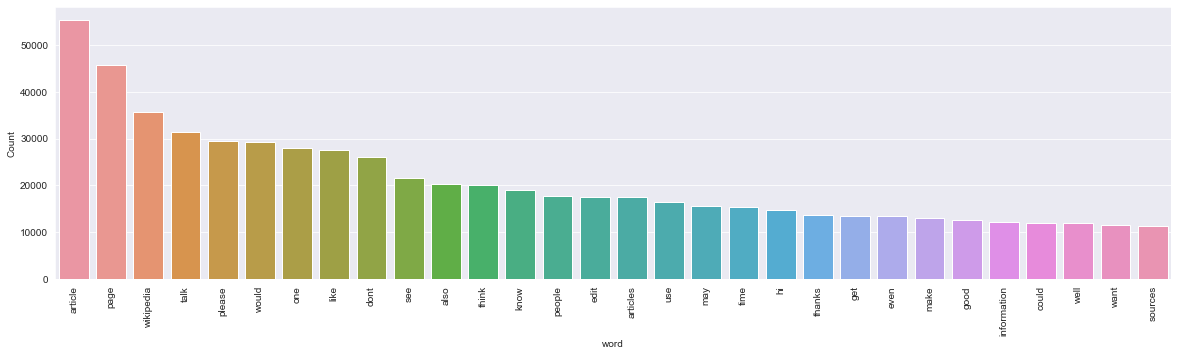

In [36]:
freq_words(train_df['comment_text'])

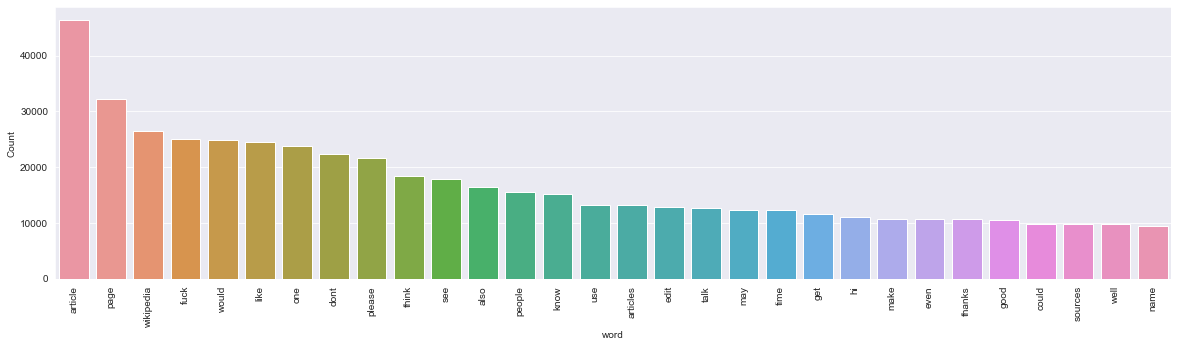

In [37]:
freq_words(test_df['comment_text'])

In [38]:
# Removing punctuations
train_df.comment_text = train_df.comment_text.str.replace("[^\w\d\s]","")
test_df.comment_text = test_df.comment_text.str.replace("[^\w\d\s]","")

In [39]:
# Stemming words
snb_stem = SnowballStemmer('english')
train_df.comment_text = train_df.comment_text.apply(lambda x: ' '.join(snb_stem.stem(word) for word in word_tokenize(x)))
test_df.comment_text = test_df.comment_text.apply(lambda x: ' '.join(snb_stem.stem(word) for word in word_tokenize(x)))

In [40]:
pd.set_option('display.max_colwidth', -1)
train_df.sample(10)

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,char_count
70035,multipl issu sourc citat provid inlin tag self publish sourc benefit editor hope satisfi editor heironym xяaɣ,0,0,0,0,0,0,194
119869,yeah saw thank ive look better one northern ireland uk sourc rather anoth countri itll fine even irish wikipedia use name sure edit chang user came talk,0,0,0,0,0,0,269
112155,continu war templat photo talk,0,0,0,0,0,0,47
76186,thank say karat gold sculptur peni hover one mile surfac sun provid excel metaphor pedagog purpos talk contrib,0,0,0,0,0,0,198
145145,advic teen nonsenc confus sad want help new group tell peopl us help peopl onlin tell peopl us thing take place world right pleas get back verysoon,0,0,0,0,0,0,282
19348,sorri sorri want see work shouldent work,0,0,0,0,0,0,67
114173,damn page want buzz,1,0,0,0,0,0,52
4616,type respons visit talk page natur wikipedia make choos user comment elimin basic state materi probabl articl reason nomin need present balanc npov manner section point star npov also must attempt provid reason nomin also present also comment conclusionari provid reason exampl la time quot state bad whoa that elementari school argument explan jrb bad npov present go ahead provid argument think jrb provid argument think jrb also conclusionari statment dont cut contract professor want hear contract void hesh want hear say contract void best,0,0,0,0,0,0,1053
125347,asshol step week amblock well id file cranki thingo ani fortun lot block expir dont amrath sensit,1,0,0,0,1,0,194
27820,user talk page,0,0,0,0,0,0,26


In [41]:
# now  checking the cleared character count
train_df['char_count_after'] = train_df['comment_text'].apply(len)
train_df.head()

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,char_count,char_count_after
0,explan edit made usernam hardcor metallica fan revert werent vandal closur gas vote new york doll fac pleas dont remov templat talk page sinc amretir,0,0,0,0,0,0,264,149
1,daww match background colour amseem stuck thank talk januari utc,0,0,0,0,0,0,112,64
2,hey man amreal tri edit war guy constant remov relev inform talk edit instead talk page seem care format actual info,0,0,0,0,0,0,233,116
3,cant make real suggest improv wonder section statist later subsect type accid think refer may need tidi exact format ie date format etc later noon els first prefer format style refer want pleas let know appear backlog articl review guess may delay review turn list relev form eg wikipediagood articl nominationstransport,0,0,0,0,0,0,622,320
4,sir hero chanc rememb page that,0,0,0,0,0,0,67,31


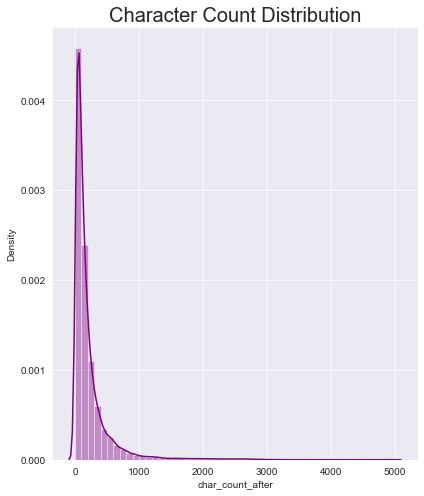

In [42]:
# Let's visulaize our character count first
plt.figure(figsize=(6,7))
sns.distplot(train_df['char_count_after'], kde=True,color='purple')
plt.title('Character Count Distribution',fontsize=20)
plt.tight_layout()

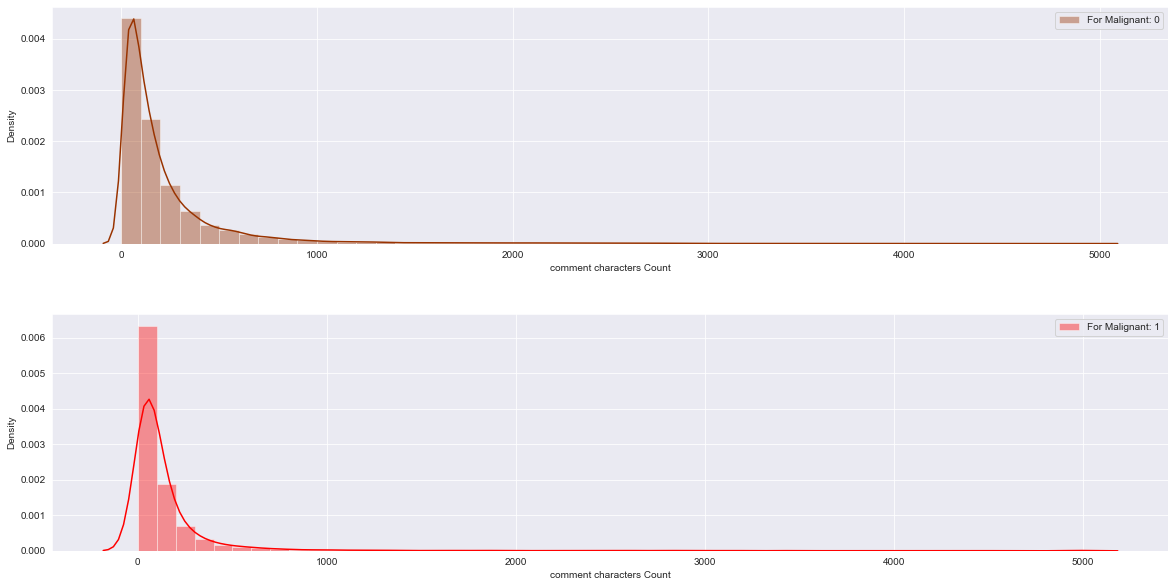

In [43]:
malignant = np.sort(train_df.malignant.unique())
cols = 1
rows = len(malignant)//cols
if rows % cols != 0:
    rows += 1
    
fig = plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace=0.3, wspace=0.2)
count = 1
colors = [(1,0,0,1),(0.6,0.2,0,1)]
for i in malignant:
    axis = fig.add_subplot(rows,cols,count)
    sns.distplot(train_df.char_count_after[train_df.malignant==i], ax=axis, label=f"For Malignant: {i}", color=colors[i-1])
    axis.set_xlabel(f"comment characters Count")
    axis.legend()
    count += 1
    
plt.show()

### Handling Outliers using ZScore

In [44]:
from scipy import stats
from scipy.stats import zscore

In [45]:
z_score=zscore(train_df[['char_count_after']])
abs_zscore=np.abs(z_score)

In [46]:
threshold=3
new_entry=(abs_zscore<threshold).all(axis=1)
df_new=train_df[new_entry]
print("The shape before: ", train_df.shape)
print("The shape after: ",df_new.shape)

The shape before:  (159571, 9)
The shape after:  (156135, 9)


#### Word Count

In [47]:
# Creating column for word counts of the clean comment
df_new['Clean_word_count'] = df_new['comment_text'].apply(lambda x: len(str(x).split(' ')))
df_new.head(10)

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,char_count,char_count_after,Clean_word_count
0,explan edit made usernam hardcor metallica fan revert werent vandal closur gas vote new york doll fac pleas dont remov templat talk page sinc amretir,0,0,0,0,0,0,264,149,25
1,daww match background colour amseem stuck thank talk januari utc,0,0,0,0,0,0,112,64,10
2,hey man amreal tri edit war guy constant remov relev inform talk edit instead talk page seem care format actual info,0,0,0,0,0,0,233,116,21
3,cant make real suggest improv wonder section statist later subsect type accid think refer may need tidi exact format ie date format etc later noon els first prefer format style refer want pleas let know appear backlog articl review guess may delay review turn list relev form eg wikipediagood articl nominationstransport,0,0,0,0,0,0,622,320,51
4,sir hero chanc rememb page that,0,0,0,0,0,0,67,31,6
5,congratul well use tool well talk,0,0,0,0,0,0,65,33,6
6,cocksuck piss around work,1,1,1,0,1,0,44,25,4
7,vandal matt shirvington articl revert pleas dont ban,0,0,0,0,0,0,115,52,8
8,sorri word nonsens offens anyway amnot intend write anyth articlewow would jump vandal ammer request encycloped one use school refer select breed page almost stub point anim breed short messi articl give info must someon around expertis eugen,0,0,0,0,0,0,472,242,38
9,align subject contrari dulithgow,0,0,0,0,0,0,70,32,4


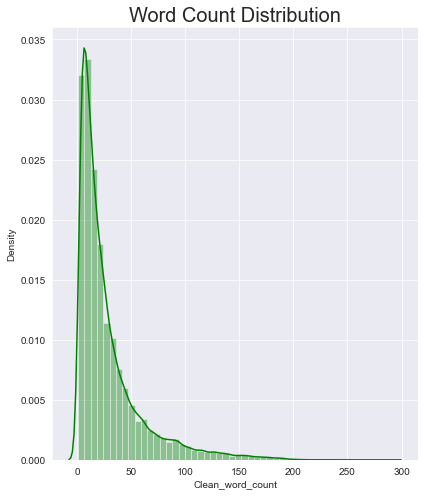

In [48]:
# Let's visulaize our word count first
plt.figure(figsize=(6,7))
sns.distplot(df_new['Clean_word_count'], kde=True,color='green')
plt.title('Word Count Distribution',fontsize=20)
plt.tight_layout()

- After doing all the necessary pre-processing we find that the words in the comments having 0 to 50 words.
- Also some comments having more than 250 words.

In [49]:
# checking NANs in the comments again
df_new.isna().sum()

comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
char_count          0
char_count_after    0
Clean_word_count    0
dtype: int64

There are no missing value so we are good to go...!!

### Creating Word Cloud

Checking the loud toxic words by Word Cloud

----------Malignant----------



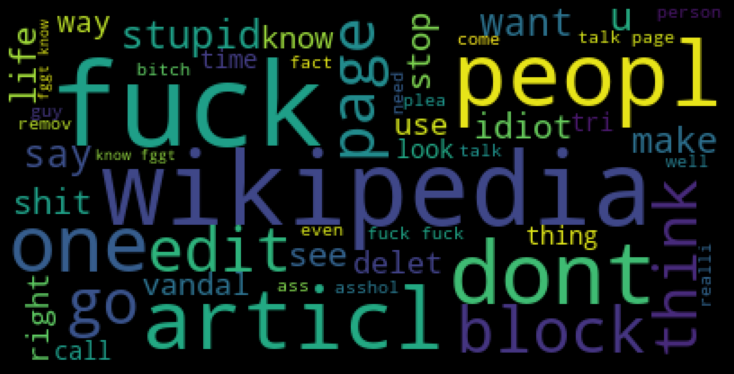

In [50]:
# malignant
print("-"*10+"Malignant"+"-"*10+"\n")
harms = df_new['comment_text'][df_new['malignant']==1]
spam_cloud = WordCloud(width=400,height=200,background_color='black',max_words=50).generate(' '.join(harms))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

----------Highly malignant----------



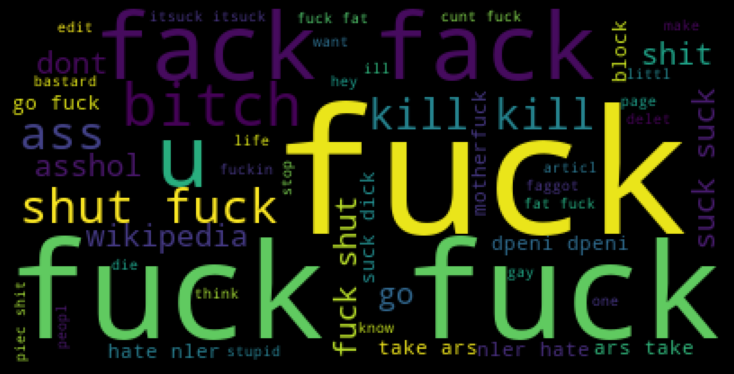

In [51]:
# Highly malignant
print("-"*10+"Highly malignant"+"-"*10+"\n")
harms = df_new['comment_text'][df_new['highly_malignant']==1]
spam_cloud = WordCloud(width=400,height=200,background_color='black',max_words=50).generate(' '.join(harms))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

----------Abuse----------



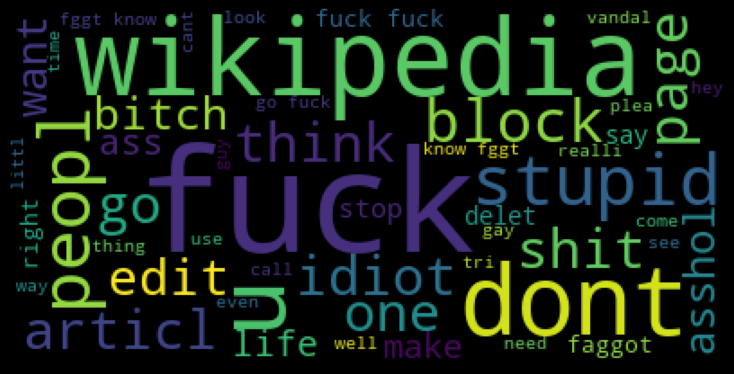

In [52]:
# Abuse
print("-"*10+"Abuse"+"-"*10+"\n")
harms = df_new['comment_text'][df_new['abuse']==1]
spam_cloud = WordCloud(width=400,height=200,background_color='black',max_words=50).generate(' '.join(harms))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

----------Rude----------



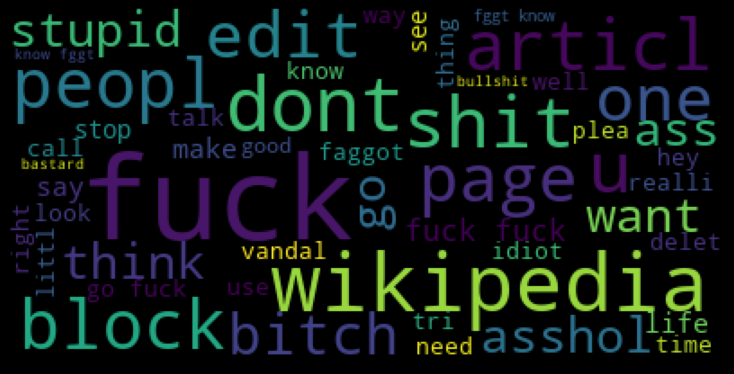

In [53]:
# Rude
print("-"*10+"Rude"+"-"*10+"\n")
harms = df_new['comment_text'][df_new['rude']==1]
spam_cloud = WordCloud(width=400,height=200,background_color='black',max_words=50).generate(' '.join(harms))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

----------Threat----------



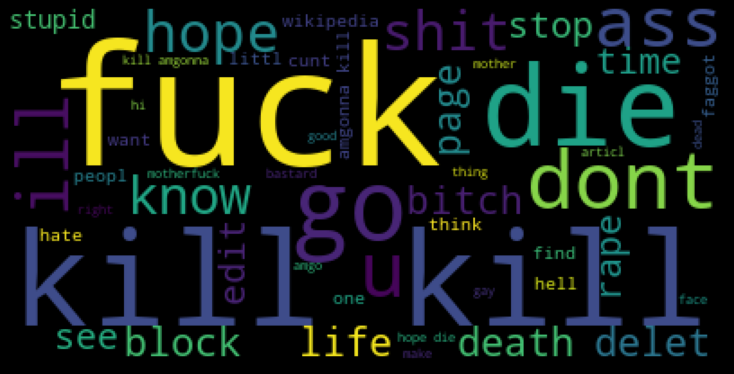

In [54]:
# Threat
print("-"*10+"Threat"+"-"*10+"\n")
harms = df_new['comment_text'][df_new['threat']==1]
spam_cloud = WordCloud(width=400,height=200,background_color='black',max_words=50).generate(' '.join(harms))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

----------Loathe----------



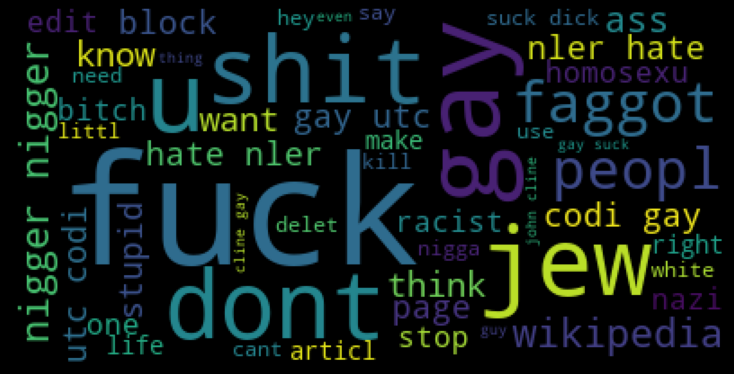

In [55]:
# Loathe
print("-"*10+"Loathe"+"-"*10+"\n")
harms = df_new['comment_text'][df_new['loathe']==1]
spam_cloud = WordCloud(width=400,height=200,background_color='black',max_words=50).generate(' '.join(harms))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

#### Observation of Word Cloud
- We can see in wordcloud of malignant comments, it is clear that it mostly consists of words like fuck, nigger, moron, hate, suck ect.
- We can see in wordcloud of highly_malignant comments, it is clear that it mostly consists of words like ass, fuck, bitch, shit, die, suck, faggot ect.
- Also we can see in wordcloud of rude comments, it is clear that it mostly consists of words like nigger, ass, fuck, suck, bullshit, bitch etc.
- We can see in wordcloud of threat comments, it is clear that it mostly consists of words like die, must die, kill, murder etc.
- We can see in wordcloud of abuse comments, it is clear that it mostly consists of words like moron, nigger, fat, jew, bitch etc.
- And at the last we can see in wordcloud of loathe comments, it is clear that it mostly consists of words like nigga, stupid, nigger, die, gay cunt etc.

### Correlation Bar Chart

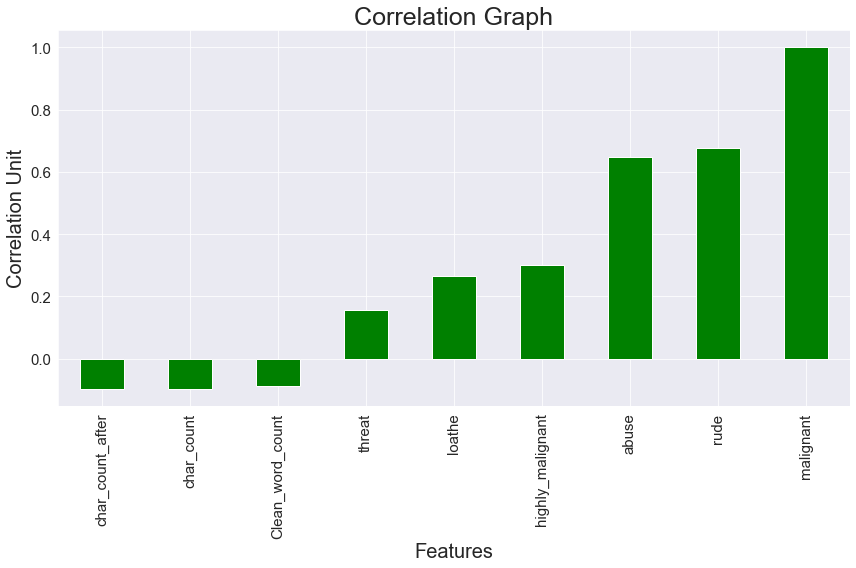

In [56]:
# correlation
plt.figure(figsize = (12, 8))
df_new.corr()['malignant'].sort_values(ascending = True).plot(kind = 'bar', color = 'green')
plt.xlabel('Features', fontsize = 20)
plt.xticks(fontsize=15)
plt.ylabel('Correlation Unit', fontsize = 20)
plt.yticks(fontsize=15)
plt.title('Correlation Graph', fontsize = 25)
plt.tight_layout()

- As we assume that abuse and rude are highly correlated with target variable.
- All the character and word count is negatively correlated with the target variable.

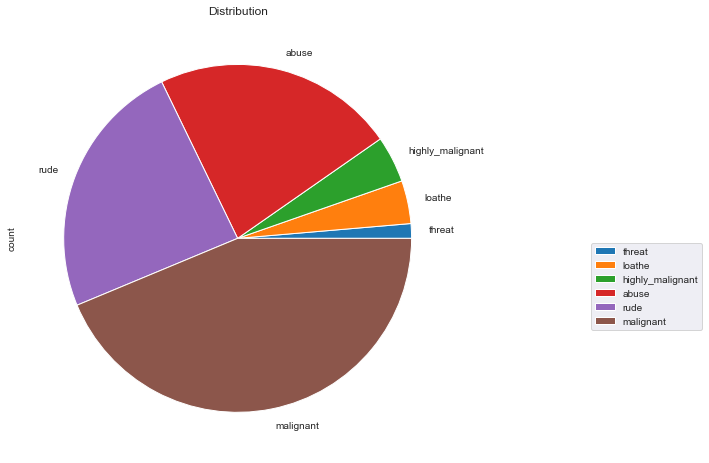

In [57]:
# Visualize the distribution

dfx = df_new[['malignant','highly_malignant','rude','threat','abuse','loathe']].sum().to_frame().rename(columns={0: 'count'}).sort_values('count')
dfx.plot.pie(y='count',title='Distribution',figsize=(8,8)).legend(loc='upper left', bbox_to_anchor=(1.3, 0.5))

### Pre-Processing for Model Building

As we already see that we observe that there are 156135 rows and only 6 columns in this final dataframe. This leads us to believe that we'll need to add more columns or delete some columns to our spreadsheet to categorise the comments based on our model's confidence.

Now what we'll do add all the columns, it means that ['malignant','highly_malignant','rude','threat','abuse','loathe'] columns will be added. If any comment falls in any category of them then we will assume that that is the 'Bad Comment'.

In [58]:
# target_features = df_new[['malignant','highly_malignant','rude','threat','abuse','loathe']]
df_new['Target'] =df_new[['malignant','highly_malignant','rude','threat','abuse','loathe']].sum(axis =1)

# we created char_count, clean_char_count and Clean_word count feature only for visualization purpose
#So they are not contribute anything in model building so we will drop them now
df_new.drop(columns=['char_count','char_count_after','Clean_word_count'],axis=1,inplace=True)
df_new.head(20)

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,Target
0,explan edit made usernam hardcor metallica fan revert werent vandal closur gas vote new york doll fac pleas dont remov templat talk page sinc amretir,0,0,0,0,0,0,0
1,daww match background colour amseem stuck thank talk januari utc,0,0,0,0,0,0,0
2,hey man amreal tri edit war guy constant remov relev inform talk edit instead talk page seem care format actual info,0,0,0,0,0,0,0
3,cant make real suggest improv wonder section statist later subsect type accid think refer may need tidi exact format ie date format etc later noon els first prefer format style refer want pleas let know appear backlog articl review guess may delay review turn list relev form eg wikipediagood articl nominationstransport,0,0,0,0,0,0,0
4,sir hero chanc rememb page that,0,0,0,0,0,0,0
5,congratul well use tool well talk,0,0,0,0,0,0,0
6,cocksuck piss around work,1,1,1,0,1,0,4
7,vandal matt shirvington articl revert pleas dont ban,0,0,0,0,0,0,0
8,sorri word nonsens offens anyway amnot intend write anyth articlewow would jump vandal ammer request encycloped one use school refer select breed page almost stub point anim breed short messi articl give info must someon around expertis eugen,0,0,0,0,0,0,0
9,align subject contrari dulithgow,0,0,0,0,0,0,0


In [59]:
df_new.Target.value_counts()

0    140240
1    6240  
3    4148  
2    3432  
4    1677  
5    368   
6    30    
Name: Target, dtype: int64

In [60]:
# Anything is greater than 0, we will assume that this is a harmful comment.
# adding all of them which are greater then 0
for i in df_new.Target:
    if i in [2,3,4,5,6]:
        df_new.Target=df_new.Target.replace(i,1)

In [61]:
df_new.Target.value_counts()

0    140240
1    15895 
Name: Target, dtype: int64

We have created Target column and separate all the harful comments and non toxic comments. But we can see that our dataset is seems that our dataset is imbalanced, which leads to our model to biased. So we have to handle it by some over sampling tools.

### Vectorization

In [62]:
#  Convert text into vectors using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vector = TfidfVectorizer(max_features = 3000, stop_words='english')
features = tf_vector.fit_transform(df_new['comment_text'])
features.shape

(156135, 3000)

In [63]:
x=features
y=df_new.Target
print(x.shape)
print(y.shape)

(156135, 3000)
(156135,)


## Model Building

In [64]:
# importing smote for imbalanced dataset

from imblearn.over_sampling import SMOTE

In [65]:
# importing train test 
from sklearn.model_selection import train_test_split

# importing the models
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier
rf=RandomForestClassifier()
adc=AdaBoostClassifier()
gbdt=GradientBoostingClassifier()
etc=ExtraTreesClassifier()
from sklearn.svm import SVC
svc=SVC()
from sklearn.linear_model import SGDClassifier
sgdc=SGDClassifier()
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB()

In [66]:
# importing Evaluating matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, precision_score, confusion_matrix, accuracy_score, classification_report

In [67]:
over_sampling=SMOTE(0.80)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=5)
x_train_new,y_train_new=over_sampling.fit_resample(x_train,y_train)

In [68]:
# Lets check the shapes of traning and test data
print("x_train", x_train_new.shape)
print("x_test", x_test.shape)
print("y_train", y_train_new.shape)
print("y_test", y_test.shape)

x_train (189342, 3000)
x_test (39034, 3000)
y_train (189342,)
y_test (39034,)


In [69]:
print(y_train_new.value_counts())
print('\n')
print(y_train_new.value_counts(normalize=True))

0    105190
1    84152 
Name: Target, dtype: int64


0    0.555556
1    0.444444
Name: Target, dtype: float64


Now we can not say that our data is imbalanced...we have handle that using oversampling method.

### Define a function for Printing the Scores

In [70]:
def print_score(Model,independent,dependent,train=True):
    Model.fit(x_train_new,y_train_new)
    if train:
        prediction=Model.predict(x_train_new)
        print('After Oversampling the  new shape of Xtrain is : ',x_train_new.shape)
        print("After oversampling the new shape of Ytrain is : ",y_train_new.shape)
        print("\n********************Traning Scores****************************\n")
        print("Accuracy Score is {} for Training Model.".format(accuracy_score(y_train_new,prediction)))
        print("\n F1 Score for the model is : \n", f1_score(y_train_new,prediction))
        print("\n*******************Confusion Matrix***************************\n")
        print(confusion_matrix(y_train_new,prediction))
        print("\n\n Training Classification Report \n",classification_report(y_train_new,prediction))
    
    if train==False:
        pred=Model.predict(x_test)
        print("\n\n")
        print("***********************Testing Scores******************************\n")
        print("Accuracy score for testing is : ", accuracy_score(y_test,pred))
        print("\n F1 Score for testing is : ", f1_score(y_test,pred))
        print("Confusion Matrix : \n",confusion_matrix(y_test,pred))
        print("\n The Classification report for Testing \n", classification_report(y_test,pred))

### Defining a function for Cross Validation

In [71]:
def Cross_validation(clf,X,Y):
    clf.fit(x_train_new,y_train_new)
    pred_y=clf.predict(x_test)
    for i in range(5,6):
        score=cross_val_score(clf,X,Y,cv=i)
        mean=score.mean()
        print("\nAt Random State {}, the cross validation score of the model is {}. And accuracy Score is {} "
              .format(i,mean,accuracy_score(y_test,pred_y)))
        print("\n The difference between corss val score and Accuaracy score is : ", mean-accuracy_score(y_test,pred_y))

## 1. LogisticRegression

In [72]:
print(print_score(lr,x,y,train=True))
print(print_score(lr,x,y,train=False))

After Oversampling the  new shape of Xtrain is :  (189342, 3000)
After oversampling the new shape of Ytrain is :  (189342,)

********************Traning Scores****************************

Accuracy Score is 0.9267199036663815 for Training Model.

 F1 Score for the model is : 
 0.9177012094215061

*******************Confusion Matrix***************************

[[98108  7082]
 [ 6793 77359]]


 Training Classification Report 
               precision    recall  f1-score   support

           0       0.94      0.93      0.93    105190
           1       0.92      0.92      0.92     84152

    accuracy                           0.93    189342
   macro avg       0.93      0.93      0.93    189342
weighted avg       0.93      0.93      0.93    189342

None



***********************Testing Scores******************************

Accuracy score for testing is :  0.9159194548342471

 F1 Score for testing is :  0.670349537967055
Confusion Matrix : 
 [[32415  2635]
 [  647  3337]]

 The Classifica

In [73]:
# cross Validation
Cross_validation(lr,x,y)


At Random State 5, the cross validation score of the model is 0.9561981618471196. And accuracy Score is 0.9159194548342471 

 The difference between corss val score and Accuaracy score is :  0.040278707012872506


## 2. DecisionTreeClassifier

In [74]:
print(print_score(dt,x,y,train=True))
print(print_score(dt,x,y,train=False))

After Oversampling the  new shape of Xtrain is :  (189342, 3000)
After oversampling the new shape of Ytrain is :  (189342,)

********************Traning Scores****************************

Accuracy Score is 0.9952678222475732 for Training Model.

 F1 Score for the model is : 
 0.994654958480481

*******************Confusion Matrix***************************

[[105078    112]
 [   784  83368]]


 Training Classification Report 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00    105190
           1       1.00      0.99      0.99     84152

    accuracy                           1.00    189342
   macro avg       1.00      0.99      1.00    189342
weighted avg       1.00      1.00      1.00    189342

None



***********************Testing Scores******************************

Accuracy score for testing is :  0.9156376492288774

 F1 Score for testing is :  0.6293753517163759
Confusion Matrix : 
 [[32945  2105]
 [ 1188  2796]]

 The Classi

In [75]:
# Cross Validation
Cross_validation(dt,x,y)


At Random State 5, the cross validation score of the model is 0.9389438626829346. And accuracy Score is 0.9159450735256444 

 The difference between corss val score and Accuaracy score is :  0.022998789157290256


## 3. RandomForestClassifier

In [76]:
print(print_score(rf,x,y,train=True))
print(print_score(rf,x,y,train=False))

After Oversampling the  new shape of Xtrain is :  (189342, 3000)
After oversampling the new shape of Ytrain is :  (189342,)

********************Traning Scores****************************

Accuracy Score is 0.9952678222475732 for Training Model.

 F1 Score for the model is : 
 0.9946578903436598

*******************Confusion Matrix***************************

[[105032    158]
 [   738  83414]]


 Training Classification Report 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00    105190
           1       1.00      0.99      0.99     84152

    accuracy                           1.00    189342
   macro avg       1.00      0.99      1.00    189342
weighted avg       1.00      1.00      1.00    189342

None



***********************Testing Scores******************************

Accuracy score for testing is :  0.9452528564840907

 F1 Score for testing is :  0.7256387212735911
Confusion Matrix : 
 [[34071   979]
 [ 1158  2826]]

 The Class

In [77]:
# Cross Validation
Cross_validation(rf,x,y)


At Random State 5, the cross validation score of the model is 0.9547250776571555. And accuracy Score is 0.9451247630271046 

 The difference between corss val score and Accuaracy score is :  0.009600314630050955


## 4. AdaBoostClassifier

In [78]:
print(print_score(adc,x,y,train=True))
print(print_score(adc,x,y,train=False))

After Oversampling the  new shape of Xtrain is :  (189342, 3000)
After oversampling the new shape of Ytrain is :  (189342,)

********************Traning Scores****************************

Accuracy Score is 0.8424755204867382 for Training Model.

 F1 Score for the model is : 
 0.7942920988744206

*******************Confusion Matrix***************************

[[101933   3257]
 [ 26569  57583]]


 Training Classification Report 
               precision    recall  f1-score   support

           0       0.79      0.97      0.87    105190
           1       0.95      0.68      0.79     84152

    accuracy                           0.84    189342
   macro avg       0.87      0.83      0.83    189342
weighted avg       0.86      0.84      0.84    189342

None



***********************Testing Scores******************************

Accuracy score for testing is :  0.9355433724445356

 F1 Score for testing is :  0.6697295878183251
Confusion Matrix : 
 [[33967  1083]
 [ 1433  2551]]

 The Class

In [79]:
# Cross Validation
Cross_validation(adc,x,y)


At Random State 5, the cross validation score of the model is 0.9478336055336728. And accuracy Score is 0.9355433724445356 

 The difference between corss val score and Accuaracy score is :  0.012290233089137237


## 5. GradientBoostingClassifier

In [80]:
print(print_score(gbdt,x,y,train=True))
print(print_score(gbdt,x,y,train=False))

After Oversampling the  new shape of Xtrain is :  (189342, 3000)
After oversampling the new shape of Ytrain is :  (189342,)

********************Traning Scores****************************

Accuracy Score is 0.843267737744399 for Training Model.

 F1 Score for the model is : 
 0.7921120840630472

*******************Confusion Matrix***************************

[[103129   2061]
 [ 27615  56537]]


 Training Classification Report 
               precision    recall  f1-score   support

           0       0.79      0.98      0.87    105190
           1       0.96      0.67      0.79     84152

    accuracy                           0.84    189342
   macro avg       0.88      0.83      0.83    189342
weighted avg       0.87      0.84      0.84    189342

None



***********************Testing Scores******************************

Accuracy score for testing is :  0.9418455705282575

 F1 Score for testing is :  0.6852468108707709
Confusion Matrix : 
 [[34293   757]
 [ 1513  2471]]

 The Classi

In [81]:
# Cross Validation
Cross_validation(gbdt,x,y)


At Random State 5, the cross validation score of the model is 0.9424344317417619. And accuracy Score is 0.9418711892196546 

 The difference between corss val score and Accuaracy score is :  0.0005632425221072657


## 6. ExtraTreesClassifier

In [82]:
print(print_score(etc,x,y,train=True))
print(print_score(etc,x,y,train=False))

After Oversampling the  new shape of Xtrain is :  (189342, 3000)
After oversampling the new shape of Ytrain is :  (189342,)

********************Traning Scores****************************

Accuracy Score is 0.9952678222475732 for Training Model.

 F1 Score for the model is : 
 0.994654958480481

*******************Confusion Matrix***************************

[[105078    112]
 [   784  83368]]


 Training Classification Report 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00    105190
           1       1.00      0.99      0.99     84152

    accuracy                           1.00    189342
   macro avg       1.00      0.99      1.00    189342
weighted avg       1.00      1.00      1.00    189342

None



***********************Testing Scores******************************

Accuracy score for testing is :  0.9499154583183891

 F1 Score for testing is :  0.7339049952361509
Confusion Matrix : 
 [[34383   667]
 [ 1288  2696]]

 The Classi

In [83]:
# Cross Validation
Cross_validation(etc,x,y)


At Random State 5, the cross validation score of the model is 0.9548403625068052. And accuracy Score is 0.9502997386893477 

 The difference between corss val score and Accuaracy score is :  0.0045406238174574565


## 7. SVC

In [84]:
print(print_score(SVC(kernel='linear'),x,y,train=True))
print(print_score(SVC(kernel='linear'),x,y,train=False))

After Oversampling the  new shape of Xtrain is :  (189342, 3000)
After oversampling the new shape of Ytrain is :  (189342,)

********************Traning Scores****************************

Accuracy Score is 0.9289381119878315 for Training Model.

 F1 Score for the model is : 
 0.9209956138033082

*******************Confusion Matrix***************************

[[97461  7729]
 [ 5726 78426]]


 Training Classification Report 
               precision    recall  f1-score   support

           0       0.94      0.93      0.94    105190
           1       0.91      0.93      0.92     84152

    accuracy                           0.93    189342
   macro avg       0.93      0.93      0.93    189342
weighted avg       0.93      0.93      0.93    189342

None



***********************Testing Scores******************************

Accuracy score for testing is :  0.9083107034892658

 F1 Score for testing is :  0.6518821126349578
Confusion Matrix : 
 [[32104  2946]
 [  633  3351]]

 The Classific

In [85]:
# Cross Validation
Cross_validation(svc,x,y)


At Random State 5, the cross validation score of the model is 0.957024369936273. And accuracy Score is 0.94832709945176 

 The difference between corss val score and Accuaracy score is :  0.008697270484513075


## 8. SGDClassifier

In [90]:
print(print_score(sgdc,x,y,train=True))
print(print_score(sgdc,x,y,train=False))

# Cross Validation
Cross_validation(sgdc,x,y)

After Oversampling the  new shape of Xtrain is :  (189342, 3000)
After oversampling the new shape of Ytrain is :  (189342,)

********************Traning Scores****************************

Accuracy Score is 0.9121008545383485 for Training Model.

 F1 Score for the model is : 
 0.9019679450553981

*******************Confusion Matrix***************************

[[96135  9055]
 [ 7588 76564]]


 Training Classification Report 
               precision    recall  f1-score   support

           0       0.93      0.91      0.92    105190
           1       0.89      0.91      0.90     84152

    accuracy                           0.91    189342
   macro avg       0.91      0.91      0.91    189342
weighted avg       0.91      0.91      0.91    189342

None



***********************Testing Scores******************************

Accuracy score for testing is :  0.9001127222421479

 F1 Score for testing is :  0.6262103345796185
Confusion Matrix : 
 [[31869  3181]
 [  718  3266]]

 The Classific

## 9. Multinomial NB

In [91]:
print(print_score(mnb,x,y,train=True))
print(print_score(mnb,x,y,train=False))

# Cross Validation
Cross_validation(mnb,x,y)

After Oversampling the  new shape of Xtrain is :  (189342, 3000)
After oversampling the new shape of Ytrain is :  (189342,)

********************Traning Scores****************************

Accuracy Score is 0.8601894983680325 for Training Model.

 F1 Score for the model is : 
 0.8301465492903525

*******************Confusion Matrix***************************

[[98180  7010]
 [19462 64690]]


 Training Classification Report 
               precision    recall  f1-score   support

           0       0.83      0.93      0.88    105190
           1       0.90      0.77      0.83     84152

    accuracy                           0.86    189342
   macro avg       0.87      0.85      0.86    189342
weighted avg       0.86      0.86      0.86    189342

None



***********************Testing Scores******************************

Accuracy score for testing is :  0.9208894809653123

 F1 Score for testing is :  0.6777290753496138
Confusion Matrix : 
 [[32699  2351]
 [  737  3247]]

 The Classific

### Conclusion

As we can see that all the models are showing almost equal accuracy But Based on the F1 Score we observe that Random Forest Classifier & Extra Teers Classifier are showing highest score. In that situation, it is little more difficult to choose our best fit model. So for that we will check the ROC AUC score for Both the models and based on that we will choose our best fit model.

In [92]:
### importing curve metrics
from sklearn.metrics import roc_curve,auc,roc_auc_score

#### RandomForestClassifier Model

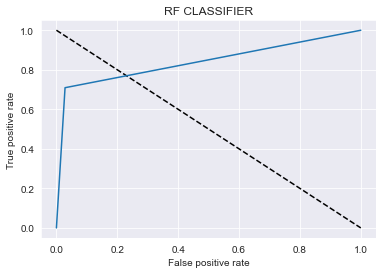

In [93]:
#Plotting the graph which tells us about the area under curve, more the area under curve more will be the better prediction
# model is performing good :
rf.fit(x_train_new,y_train_new)
y_pred_test=rf.predict(x_test)
fpr,tpr,thresholds=roc_curve(y_test,y_pred_test)
roc_auc=auc(fpr,tpr)
plt.plot([0,1],[1,0],'k--')
plt.plot(fpr,tpr,label = 'RF Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('RF CLASSIFIER')
plt.show()

#### ExtraTreesClassifier Model

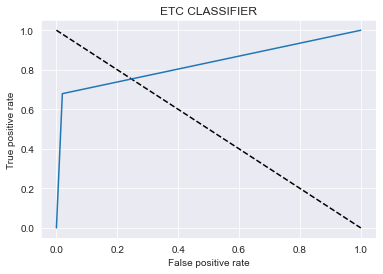

In [94]:
#Plotting the graph which tells us about the area under curve, more the area under curve more will be the better prediction
# model is performing good 
etc.fit(x_train_new,y_train_new)
y_pred_test=etc.predict(x_test)
fpr,tpr,thresholds=roc_curve(y_test,y_pred_test)
roc_auc=auc(fpr,tpr)
plt.plot([0,1],[1,0],'k--')
plt.plot(fpr,tpr,label = 'ExtraTrees Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ETC CLASSIFIER')
plt.show()

### As we can see that Random Forest accupy the more area under the curve. So we will select this as the Best fit model.

## Hyper-Parameter Tunning

In [95]:
from sklearn.model_selection import train_test_split, GridSearchCV ,RandomizedSearchCV

In [96]:
# Lets select the different parameters for tuning our best model (RandomForestClassifier)
grid_params = {'n_estimators':[100,200],
               'criterion':['gini','entropy'],
               'bootstrap':[True,False]}

# Train the model with given parameters using GridSearchCV
GSCV =  RandomizedSearchCV(RandomForestClassifier(), grid_params, cv=5, verbose=3,n_jobs=-1)
GSCV.fit(x_train_new, y_train_new)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'n_estimators': [100, 200]},
                   verbose=3)

In [97]:
print(GSCV.best_params_)

{'n_estimators': 200, 'criterion': 'entropy', 'bootstrap': False}


In [98]:
# Model Evaluation
rf=RandomForestClassifier(n_estimators=200,criterion="entropy",bootstrap=False)
rf.fit(x_train_new,y_train_new)
prediction=rf.predict(x_test)
print("\n\n")
print("***********************Testing Scores******************************\n")
print("Accuracy score for testing is : ", accuracy_score(y_test,prediction))
# Printing the classification report
print(f"\nCLASSIFICATION REPORT: \n {classification_report(y_test, prediction)}")
# Printing the Confusion matrix
print(f"\nCONFUSION MATRIX: \n {confusion_matrix(y_test, prediction)}")




***********************Testing Scores******************************

Accuracy score for testing is :  0.9478659630066096

CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97     35050
           1       0.78      0.68      0.73      3984

    accuracy                           0.95     39034
   macro avg       0.87      0.83      0.85     39034
weighted avg       0.95      0.95      0.95     39034


CONFUSION MATRIX: 
 [[34296   754]
 [ 1281  2703]]


In [99]:
import scikitplot as sktplt

<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

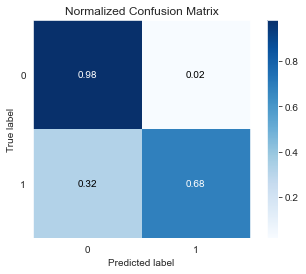

In [100]:
# Visualize the confusion matrix:
sktplt.metrics.plot_confusion_matrix(y_test, prediction, normalize=True)

### ROC AUC Curve

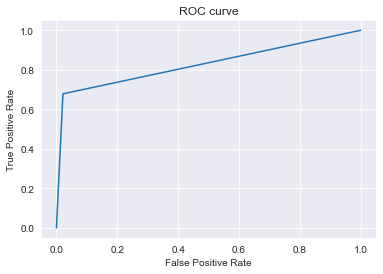

AUC value is 0.8284758649433682 


In [101]:
from sklearn.metrics import roc_curve,auc
fpr, tpr, threshold= roc_curve(y_test,prediction)
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve")
plt.show()
print("AUC value is {} ".format(auc(fpr, tpr)))

### Saving the Model

In [102]:
import joblib
joblib.dump(rf,'Malignant_comment_classification_model')

['Malignant_comment_classification_model']

## Acutal Vs Prediction

In [103]:
original=np.array(y_test)
predicted=np.array(rf.predict(x_test))
new_df=pd.DataFrame({'Actual':original,'Predicted':predicted},index=range(len(original)))
new_df

,Actual,Predicted
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0
...,...,...
39029,1,0
39030,0,0
39031,0,0
39032,0,0


In [105]:
# saving it in the local
new_df.to_csv(r"Actual VS Predicted.csv")

## Prediction of Testing DataSet

In [106]:
test_df.head(10)

,comment_text
0,bitch ja rule succes youll ever what hate sad mofuckasi bitch slap ur pethed white face get kiss ass guy sicken ja rule pride da music man dont diss shit hi amand nothin wrong bein like tupac brother toofuckin white boy get thing right next time
1,rfc titl fine imo
2,sourc zaw ashton lapland
3,look back sourc inform updat correct form guess sourc hadnt updat shall updat inform thank messag
4,dont anonym edit articl
5,thank understand think high would revert without discuss
6,pleas add nonsens wikipedia edit consid vandal quick undon would like experi pleas use sandbox instead thank
7,dear god site horribl
8,fool believ number correct number lie ponder number care error persist long time continu reproduc latest reproduct know encyclopædia britannica almanac wich state magnittud fair enough victim today lot guess peopl come number impress enough dont know know shameless lucki number throw air gc
9,doubl redirect fix doubl redirect dont blank outer one need edit point final target unless think inappropri case need nomin wprfd


In [107]:
# Vectorization
#  Convert text into vectors using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vector = TfidfVectorizer(max_features = 3000, stop_words='english')
X = tf_vector.fit_transform(test_df['comment_text'])
X.shape

(153164, 3000)

In [108]:
test_prediction=rf.predict(X)

In [109]:
# Adding prediction into the dataframe
test_df['Predicted_output']=test_prediction
test_df.head(10)

,comment_text,Predicted_output
0,bitch ja rule succes youll ever what hate sad mofuckasi bitch slap ur pethed white face get kiss ass guy sicken ja rule pride da music man dont diss shit hi amand nothin wrong bein like tupac brother toofuckin white boy get thing right next time,0
1,rfc titl fine imo,0
2,sourc zaw ashton lapland,0
3,look back sourc inform updat correct form guess sourc hadnt updat shall updat inform thank messag,0
4,dont anonym edit articl,0
5,thank understand think high would revert without discuss,0
6,pleas add nonsens wikipedia edit consid vandal quick undon would like experi pleas use sandbox instead thank,0
7,dear god site horribl,0
8,fool believ number correct number lie ponder number care error persist long time continu reproduc latest reproduct know encyclopædia britannica almanac wich state magnittud fair enough victim today lot guess peopl come number impress enough dont know know shameless lucki number throw air gc,0
9,doubl redirect fix doubl redirect dont blank outer one need edit point final target unless think inappropri case need nomin wprfd,0


In [111]:
# Saving in the local
test_df.to_csv(r"Testing_dataset_prediction.csv")

## Problems faced while working in this project:

- More computational power was required as it took more than 3 hours
- Imbalanced dataset and bad comment texts
- Good parameters could not be obtained using hyperparameter tuning as time was consumed more